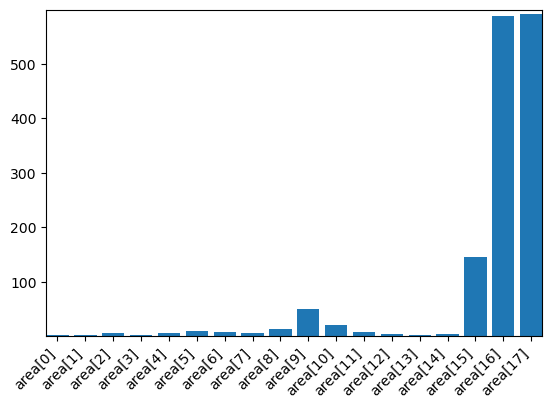

In [6]:
import pandas
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

development = pandas.read_csv("./../../DSL_Winter_Project_2024/development.csv")


#pmax_features = []
#negpmax_features = []
#tmax_features = []
area_features = []
#rms_features = []

for i in range(0, 18):
    #pmax_features.append("pmax[%s]" % (i))
    #negpmax_features.append("negpmax[%s]" % (i))
    #tmax_features.append("tmax[%s]" % (i))
    area_features.append("area[%s]" % (i))
    #rms_features.append("rms[%s]" % (i))

df = development[area_features].head(100)

bar_width=0.4
bar_padding=0.1
fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
bar_positions = [i * (bar_width + bar_padding) for i in range(len(df.columns))]
ax.set_xlim(0, len(df.columns) - 1)
ax.set_ylim(df.values.min(), df.values.max() + 1)

bars = ax.bar(bar_positions, [0] * len(df.columns), width=bar_width, tick_label=area_features)

# update function
def update(frame):
    heights = df.iloc[frame].values
    for bar, height, position in zip(bars, heights, bar_positions):
        bar.set_height(height)
        bar.set_x(position - bar_width / 2) # fix the position of each bar
    return bars

ax.set_xlim(min(bar_positions) - bar_width / 2, max(bar_positions) + bar_width / 2)

plt.xticks(rotation=45, ha='right')
animation = FuncAnimation(fig, update, frames=len(df), interval=500, blit=True)
#plt.tight_layout()
#plt.show()

html_output = animation.to_jshtml()
HTML(html_output)
#animation.save('animation.mp4', writer='Pillow')

In [7]:
df.head(1)

,area[0],area[1],area[2],area[3],area[4],area[5],area[6],area[7],area[8],area[9],area[10],area[11],area[12],area[13],area[14],area[15],area[16],area[17]
0,2.847932,4.538778,3.132328,3.621973,7.215259,5.520791,2.079597,1.456941,13.374258,48.422567,23.152819,7.611376,2.288938,4.191909,4.88468,146.036298,583.899899,591.852768
